<a href="https://colab.research.google.com/github/824024445/KaggleCases/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0kaggle%E6%A1%88%E4%BE%8B%EF%BC%9A%E9%A3%8E%E6%8E%A7%E8%AF%84%E5%88%86%E5%8D%A1%E6%A8%A1%E5%9E%8B%EF%BC%88Give_Me_Some_Credit%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 一、简介
kaggle上经典的风控模型：通过预测未来两年内某人将面临财务困境的可能性，提高信用评分的现有水平

### 1.1 比赛描述

银行在市场经济中起着至关重要的作用。他们决定谁可以获得融资以及在什么条件下获得投资决策。要使市场和社会发挥作用，个人和公司需要获得信贷。 

信用评分算法，用于猜测违约概率，是银行用来确定是否应该授予贷款的方法。

该竞赛要求参与者通过预测某人在未来两年内遇到财务困境的可能性来改进信用评分的现有技术水平。 

本次竞赛的目标是建立一个借款人可以用来帮助做出最佳财务决策的模型。 250,000名借款人提供历史数据，奖金池为5,000美元（第一名为3,000美元，第二名为1,500美元，第三名为500美元）。

### 1.2 比赛评估

使用AUC(Area Under 
ROC Curve)作为性能性能评估标准。意思是ROC曲线下的面积

ROC全称是受试者工作特征。横坐标是假正例率（False Positive 
Rate），纵坐标是真正例率（True Positive 
Rate）

![替代文字](https://raw.githubusercontent.com/824024445/KaggleCases/master/img/GiveMeSomeCredict/1-2.jpg)
![替代文字](https://raw.githubusercontent.com/824024445/KaggleCases/master/img/GiveMeSomeCredict/1-1.jpg)
![替代文字](https://raw.githubusercontent.com/824024445/KaggleCases/master/img/GiveMeSomeCredict/1-3.png)

### 1.3 数据描述

数据字典(取自Data Dictionary.xls文件）：

在这里讲一下，kaggle每个竞赛都会提供
- 数据字典（可能是在介绍中也可能是单独提供一个数据字典文件，就像这个案例一样）
- 一个训练集
- 一个测试集（不含目标值）
- 一个提交文件的示例（本案例就是sampleEntry.csv文件）



<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Variable Name</th>
      <th>Description</th>
      <th>Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>SeriousDlqin2yrs（目标值）</td>
      <td>是否有超过90天或更长时间逾期未还的不良行为</td>
      <td>Y/N（0为好1为坏）</td>
    </tr>
    <tr>
      <th>2</th>
      <td>RevolvingUtilizationOfUnsecuredLines</td>
      <td>可用额度比值</td>
      <td>percentage</td>
    </tr>
    <tr>
      <th>3</th>
      <td>age</td>
      <td>年龄</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>4</th>
      <td>NumberOfTime30-59DaysPastDueNotWorse</td>
      <td>逾期30-59天笔数</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>5</th>
      <td>DebtRatio</td>
      <td>还款率(每月偿还债务，赡养费，生活费用).</td>
      <td>percentage</td>
    </tr>
    <tr>
      <th>6</th>
      <td>MonthlyIncome</td>
      <td>月收入</td>
      <td>real</td>
    </tr>
    <tr>
      <th>7</th>
      <td>NumberOfOpenCreditLinesAndLoans</td>
      <td>信贷数量</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>8</th>
      <td>NumberOfTimes90DaysLate</td>
      <td>逾期90天笔数</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>9</th>
      <td>NumberRealEstateLoansOrLines</td>
      <td>固定资产贷款量</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>10</th>
      <td>NumberOfTime60-89DaysPastDueNotWorse</td>
      <td>逾期60-89天笔数</td>
      <td>integer</td>
    </tr>
    <tr>
      <th>11</th>
      <td>NumberOfDependents</td>
      <td>家属数量</td>
      <td>integer</td>
    </tr>
  </tbody>
</table>



### 1.4 行业知识补充


信用评分模型的书：[陈建的《信用评分模型与应用》](https://pan.baidu.com/s/1980a4)

风控模型：先说分类，本文评分卡模型属于**A卡申请者评级模型**


信用风险计量体系包括主体评级模型和债项评级两部分。主体评级和债项评级均有一系列评级模型组成，其中主体评级模型可用“四张卡”来表示，分别是A卡、B卡、C卡和F卡；债项评级模型通常按照主体的融资用途，分为企业融资模型、现金流融资模型和项目融资模型等。


**A卡，又称为申请者评级模型**，个人用户申请相应的金融产品，对用户进行筛选分类，区分好坏用户，据此决定是否通过申请。在获客过程中用到的信用风险模型。从模型的角度来看，它会对用户未来一定周期内的逾期风险作预测，即模型会在用户授权的情况下收集用户多维度的信息，以此来预测逾期概率。预测的逾期概率被用于风控策略或者转换成信用评分，比如国外经典的FICO评分，国内的蚂蚁信用评分、京东小白评分、携程金融的程信分等。A卡评分除了用于决定是否通过用户的信用申请，还用于风险定价，比如额度、利率等


**B卡，又称为行为评级模型**，在用户使用金融产品的过程中，根据用户的历史使用的行为数据对用户进行评级，对可能出现的逾期、延期等行为进行预测。用户拿到信用额度后，模型根据用户的贷中行为数据，进行风险水平的预测。本质上讲，这个模型是一个事件驱动的模型，在互联网金融领域，一般会比A卡的预测时间窗口要短，对用户的行为更为敏感。B卡除了可以用于高风险用户的拦截，也可以作为额度、利率调整的重要参考因素。


**C卡，又称为催收评级模型**，对业务中的存量客户是否需要催收进行预测。例如当用户出现逾期时，机构应该先催谁，或者哪些用户不用催，就自动会把钱还回来。催收模型一定程度节约催收成本，提高回催率。


**F卡，又称为欺诈评级模型**，对业务中的新用户可能存在的欺诈行为进行预测。根据用户提交的材料进行身份核实，确保用户不存在欺诈行为；

风控建模所使用的客户数据主要分为：(1)信贷数据,(2)资质数据,(3)消费数据,(4)行为数据。

![替代文字](https://raw.githubusercontent.com/824024445/KaggleCases/master/img/GiveMeSomeCredict/credict-1.png)



风控中常用的模型  
![替代文字](https://raw.githubusercontent.com/824024445/KaggleCases/master/img/GiveMeSomeCredict/1-4.jpg)

就先补充这么多吧。跟细致的以后再写。

## 二、代码

### 2.1 获取数据

#### 2.1.1 下载数据
我写了一个小函数来实现数据的下载，数据全都是官网原版数据，我存到了我的github上。（https://github.com/824024445/KaggleCases）  

所有数据都下载到了你当前文件夹下的datasets文件下，每个案例涉及到的数据全部下载到了以该案例命名的文件夹下。  

我所有的kaggle案例的博客，下载数据均会使用这个函数，只需要修改前两个常量即可。
> 注：此函数只用于下载数据，函数在该代码框内就运行了。不再用到其它代码中，包括常量，也不会用在其他地方。

In [0]:
import os
import zipfile
from six.moves import urllib

FILE_NAME = "GiveMeSomeCredit.zip" #文件名
DATA_PATH ="datasets/GiveMeSomeCredit" #存储文件的文件夹，取跟文件相同（相近）的名字便于区分
DATA_URL = "https://github.com/824024445/KaggleCases/blob/master/datasets/" + FILE_NAME + "?raw=true"


def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_name=FILE_NAME):
    if not os.path.isdir(data_path): #查看当前文件夹下是否存在"datasets/GiveMeSomeCredit"，没有的话创建
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, file_name) #下载到本地的文件的路径及名称
    # urlretrieve()方法直接将远程数据下载到本地
    urllib.request.urlretrieve(data_url, zip_path) #第二个参数zip_path是保存到的本地路径
    data_zip = zipfile.ZipFile(zip_path)
    data_zip.extractall(path=data_path) #什么参数都不输入就是默认解压到当前文件,为了保持统一，是泰坦尼克的数据就全部存到GiveMeSomeCredit文件夹下
    data_zip.close()
fetch_data()

#### 2.1.2 读取数据

In [189]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("datasets/GiveMeSomeCredit/cs-training.csv")
test_df = pd.read_csv("datasets/GiveMeSomeCredit/cs-test.csv")
combine=[train_df, test_df]
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 2.2 观察数据

#### 2.2.1 info()

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


观察到：
- "MonthlyIncome"和"NumberOfDependents"有空值。等会数据清洗把空值处理了。

In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB


#### 2.2.2 decribe()

In [64]:
#decribe查看数值型数据的信息.没有非数值型的数据，所以不使用describe(include=['O'])查看非数值型数据了。
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


观察到：
- "NumberOfDependents" 有50%以上的人没有家属，离散值较大，选取众数填充null

#### 2.2.3 corr()查找关联

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
Unnamed: 0                              0.002801
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
NumberOfDependents                     -0.013881
MonthlyIncome                          -0.018002
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64


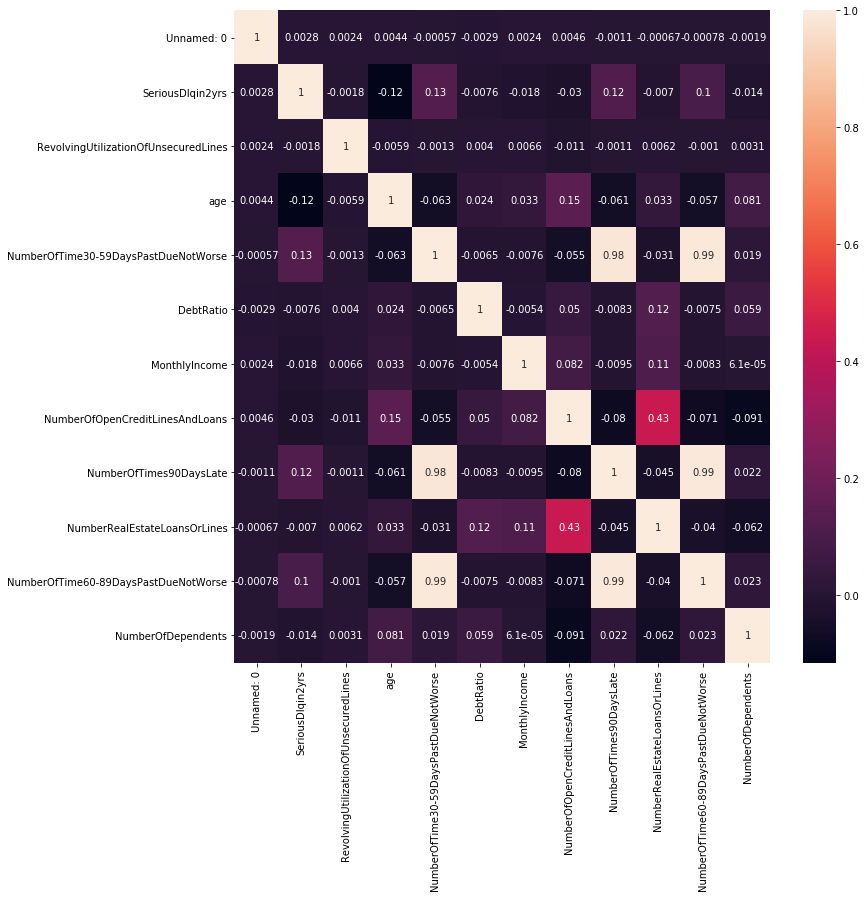

In [122]:
#查找关联(后面清洗数据的时候也要经常用的，用来比较效果) 
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = train_df.corr()
print(corr_matrix["SeriousDlqin2yrs"].sort_values(ascending=False))
# 下面的代码是图形化地展示各特征之间的相关性
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,annot=True)

查找SeriousDlqin2yrs（目标值，越小越好）与其它特征的相关性
- 其余特征，各特征相关性超过60%的就可以只用一个特征建模，此案例中，NumberOfTime30-59DaysPastDueNotWorse，NumberOfTimes90DaysLate，NumberOfTime60-89DaysPastDueNotWorse可以只用一个

### 2.3 数据清洗
清晰地还不是很好，过段时间我会重新整理的。其实，如果是纯自己探索的话，观察数据和数据清洗应该是一直交替进行的

#### 2.3.1 缺失值处理

In [190]:
for data in combine:
  data["MonthlyIncome"].fillna(data["MonthlyIncome"].mean(), inplace=True)
  data["NumberOfDependents"].fillna(data["MonthlyIncome"].mode()[0], inplace=True)
#查看一下替换后的数据，嗯，没有空值了
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


#### 2.3.2 异常值处理

NumberOfDependents

In [191]:
#可以看到，家属数量居然有6670的,而且数量还不少，占到了2.6%,先用平均值填补吧
train_df.NumberOfDependents.value_counts()

0.000000       86902
1.000000       26316
2.000000       19522
3.000000        9483
6670.221237     3924
4.000000        2862
5.000000         746
6.000000         158
7.000000          51
8.000000          24
9.000000           5
10.000000          5
13.000000          1
20.000000          1
Name: NumberOfDependents, dtype: int64

In [192]:
##填补前先看一下家属数和目标值的相关性，以便看一下效果,没处理前相关度-0.013881（我把所有的相关性列出来，是为了好随时查看其它几个的相关性）
corr_matrix = train_df.corr()
corr_matrix["SeriousDlqin2yrs"].sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
Unnamed: 0                              0.002801
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
NumberOfDependents                     -0.013881
MonthlyIncome                          -0.018002
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

In [193]:
for data in combine:
  data["NumberOfDependents"][data["NumberOfDependents"]>30] = 0
  
corr_matrix = train_df.corr()
corr_matrix["SeriousDlqin2yrs"].sort_values(ascending=False)
#修改异常值后"NumberOfDependents"的相关性达到了0.046869

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046869
Unnamed: 0                              0.002801
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.018002
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

age

In [194]:
train_df = train_df[train_df["age"]>18]
test_df = test_df[test_df["age"]>18]

combine = [train_df, test_df]
train_df[train_df["age"]<18]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


#### 2.3.3 创建新特征

In [0]:
for data in combine:
  data["CombinedDefaulted"] = data["NumberOfTimes90DaysLate"] + data["NumberOfTime60-89DaysPastDueNotWorse"] + data["NumberOfTime30-59DaysPastDueNotWorse"]
  data.loc[(data["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1
  data["CombinedCreditLoans"] = data["NumberOfOpenCreditLinesAndLoans"] + data["NumberRealEstateLoansOrLines"]

  data["CombinedCreditLoans"] = data["NumberOfOpenCreditLinesAndLoans"] + data["NumberRealEstateLoansOrLines"]
  data.loc[(data["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
  data.loc[(data["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1


In [159]:
train_df.corr()["SeriousDlqin2yrs"][["CombinedDefaulted", "CombinedCreditLoans"]]

CombinedDefaulted      0.314415
CombinedCreditLoans   -0.054778
Name: SeriousDlqin2yrs, dtype: float64

### 2.4 模型和预测

数据集要再切分一下，前面的test是用来最终测试的，没有目标值，提交到kaggle之后它会返回给你一个AUC成绩，相当于评价泛化能力。而现在首先要自己评价当前模型

In [0]:
attributes=["SeriousDlqin2yrs", 'age','NumberOfTime30-59DaysPastDueNotWorse','NumberOfDependents','MonthlyIncome',"CombinedDefaulted","CombinedCreditLoans"]
sol=['SeriousDlqin2yrs']

attributes2 = ["Unnamed: 0", 'age','NumberOfTime30-59DaysPastDueNotWorse','NumberOfDependents','MonthlyIncome',"CombinedDefaulted","CombinedCreditLoans"]
sol=['SeriousDlqin2yrs']

train_df = train_df[attributes]
test_df = test_df[attributes2]


#### 2.4.1 逻辑回归

为了快速测试，写了一个类

In [0]:
import time
import os
from sklearn.model_selection import cross_validate

class Tester():
    def __init__(self, target):
        self.target = target
        self.datasets = {}
        self.models = {}
        self.cache = {} # 我们添加了一个简单的缓存来加快速度

    def addDataset(self, name, df):
        self.datasets[name] = df.copy()

    def addModel(self, name, model):
        self.models[name] = model
        
    def clearModels(self):
        self.models = {}

    def clearCache(self):
        self.cache = {}
    
    def testModelWithDataset(self, m_name, df_name, sample_len, cv):
        if (m_name, df_name, sample_len, cv) in self.cache:
            return self.cache[(m_name, df_name, sample_len, cv)]

        clf = self.models[m_name]
        
        if not sample_len: 
            sample = self.datasets[df_name]
        else: sample = self.datasets[df_name].sample(sample_len)
            
        X = sample.drop([self.target], axis=1)
        Y = sample[self.target]

        s = cross_validate(clf, X, Y, scoring=['roc_auc'], cv=cv, n_jobs=-1)
        self.cache[(m_name, df_name, sample_len, cv)] = s

        return s

    def runTests(self, sample_len=80000, cv=4):
        # 在所有添加的数据集上测试添加的模型
        scores = {}
        for m_name in self.models:
            for df_name in self.datasets:
                # print('Testing %s' % str((m_name, df_name)), end='')
                start = time.time()

                score = self.testModelWithDataset(m_name, df_name, sample_len, cv)
                scores[(m_name, df_name)] = score
                
                end = time.time()
                
                # print(' -- %0.2fs ' % (end - start))

        print('--- Top 10 Results ---')
        for score in sorted(scores.items(), key=lambda x: -1 * x[1]['test_roc_auc'].mean())[:10]:
            auc = score[1]['test_roc_auc']
            print("%s --> AUC: %0.4f (+/- %0.4f)" % (str(score[0]), auc.mean(), auc.std()))
    

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 我们将在所有模型中使用测试对象
tester = Tester('SeriousDlqin2yrs')

# 添加数据集
tester.addDataset('Drop Missing', train_df.dropna())

# 添加模型
rfc = RandomForestClassifier(n_estimators=15, max_depth = 6, random_state=0)
log = LogisticRegression()
tester.addModel('Simple Random Forest', rfc)
tester.addModel('Simple Logistic Regression', log)

# 测试
tester.runTests()

--- Top 10 Results ---
('Simple Random Forest', 'Drop Missing') --> AUC: 0.8128 (+/- 0.0085)
('Simple Logistic Regression', 'Drop Missing') --> AUC: 0.7884 (+/- 0.0107)


In [0]:
X_train = train_df.drop(['SeriousDlqin2yrs'], axis=1)
Y_train = train_df['SeriousDlqin2yrs']

X_test = test_df.drop(["Unnamed: 0"], axis=1)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict_proba(X_test)


In [0]:
submission = pd.DataFrame({
        "Id": test_df["Unnamed: 0"],
        "Probability": pd.DataFrame(Y_pred)[1]
    })

submission.to_csv('submission.csv', index=False)

最终结果：得分0.81032，最高分是0.86955